In [1]:
import zipfile

# Files in the current folder to include in ZIP
file = ['data.csv']
    

# Output zip file name
zip_name = 'summer school.zip'

# Create ZIP file
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for file in file:
        zipf.write(file)

print(f"Created ZIP: {zip_name}")


Created ZIP: summer school.zip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(
    'data.csv',
    parse_dates=['date'])

## A1

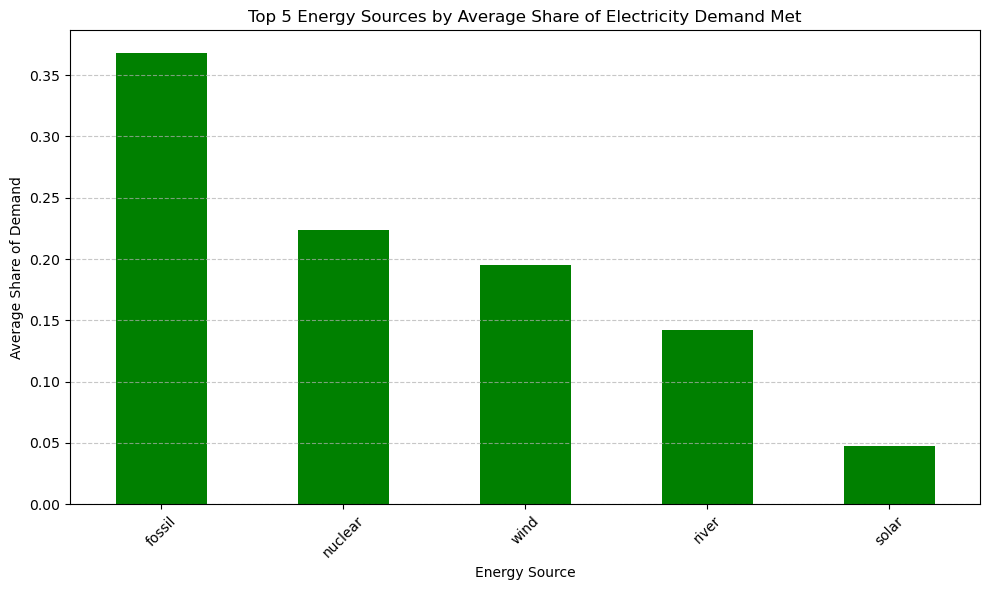

In [6]:
# List of energy production sources
sources = [
    'fossil', 'nuclear', 'energy_other', 'solar', 'biomass',
    'river', 'energy_other_renewable', 'energy_waste', 'wind'
]

# Compute share of demand for each source
for source in sources:
    data[f'share_{source}'] = data[source] / data['demand']

# Compute the average share for each source
average_shares = {
    source: data[f'share_{source}'].mean()
    for source in sources
}

# Convert to DataFrame and sort
avg_share_df = pd.DataFrame.from_dict(average_shares, orient='index', columns=['average_share'])
avg_share_df = avg_share_df.sort_values(by='average_share', ascending=False)

# Top 5 sources
top5 = avg_share_df.head(5)

# Plot
plt.figure(figsize=(10, 6))
top5['average_share'].plot(kind='bar', color='green')
plt.title('Top 5 Energy Sources by Average Share of Electricity Demand Met')
plt.ylabel('Average Share of Demand')
plt.xlabel('Energy Source')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [7]:
# Average share per source as percentages
average_shares_percent = {
    source: round(100 * data[f'share_{source}'].mean(), 2)
    for source in sources
}

# Convert to DataFrame
avg_share_df = pd.DataFrame.from_dict(average_shares_percent, orient='index', columns=['average_share_percent'])
avg_share_df = avg_share_df.sort_values(by='average_share_percent', ascending=False)

# Display the results
print("Average percentage of electricity demand met by each source:")
print(avg_share_df)

Average percentage of electricity demand met by each source:
                        average_share_percent
fossil                                  36.82
nuclear                                 22.37
wind                                    19.48
river                                   14.24
solar                                    4.73
biomass                                  1.37
energy_waste                             0.96
energy_other_renewable                   0.30
energy_other                             0.21


## A2

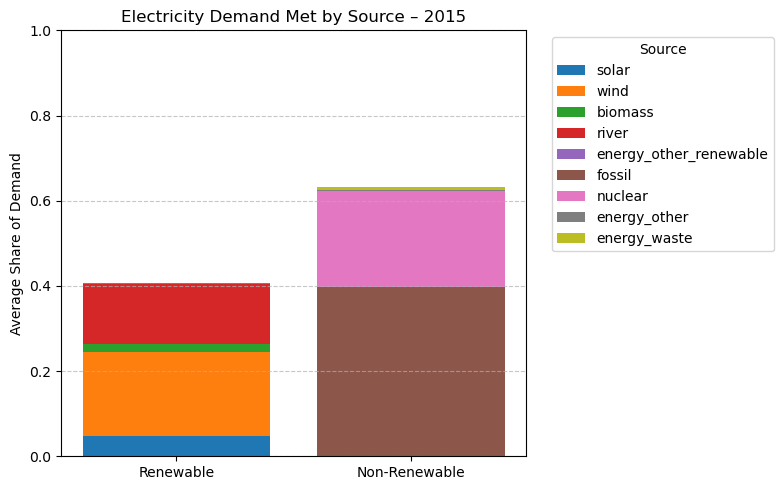

✅ saved energy_share_2015.png


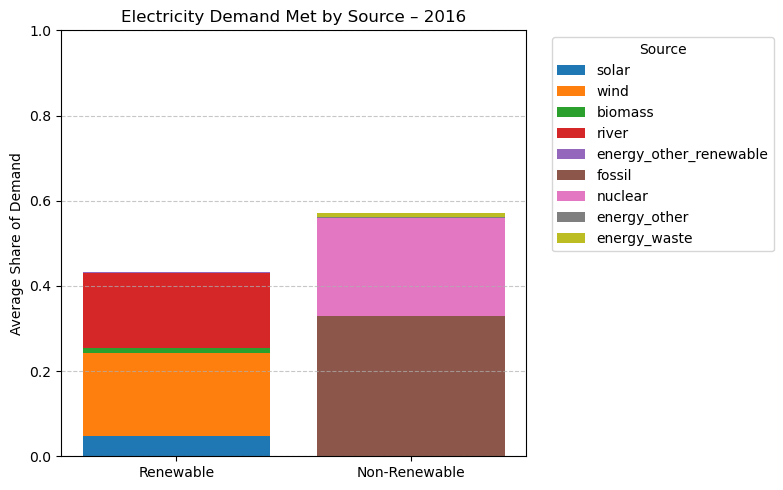

✅ saved energy_share_2016.png


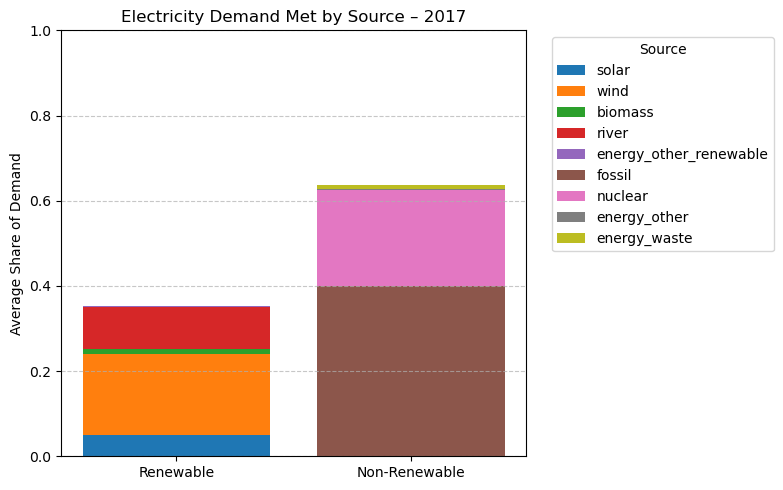

✅ saved energy_share_2017.png


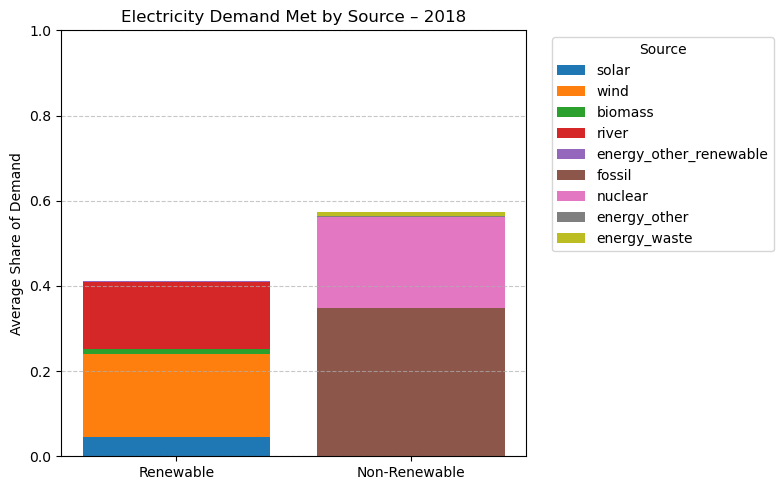

✅ saved energy_share_2018.png


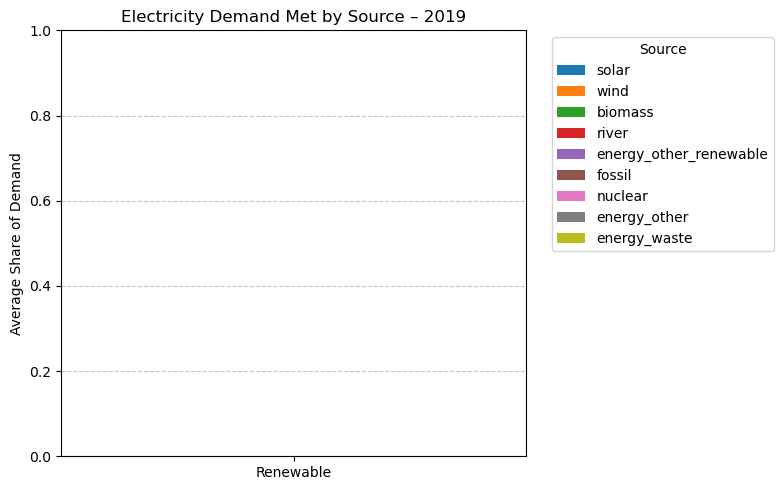

✅ saved energy_share_2019.png


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Source groups ----------------------------------------------------------
renewable_sources     = ['solar', 'wind', 'biomass', 'river', 'energy_other_renewable']
non_renewable_sources = ['fossil', 'nuclear', 'energy_other', 'energy_waste']
sources               = renewable_sources + non_renewable_sources

# --- Pre-compute per-row demand shares --------------------------------------
for src in sources:
    data[f'share_{src}'] = data[src] / data['demand']

# --- Plot one stacked bar per calendar year ---------------------------------
for year in range(2015, 2020):
    df_year = data[data['Year'] == year]

    # Average share in that year
    avg_share = {src: df_year[f'share_{src}'].mean() for src in sources}

    # Initialise figure
    fig, ax = plt.subplots(figsize=(8, 5))

    # --- Stack renewable block ---
    bottom = 0
    for src in renewable_sources:
        val = avg_share[src]
        ax.bar("Renewable", val, bottom=bottom, label=src)
        bottom += val

    # --- Stack non-renewable block ---
    bottom = 0
    for src in non_renewable_sources:
        val = avg_share[src]
        ax.bar("Non-Renewable", val, bottom=bottom, label=src)
        bottom += val

    # Formatting
    ax.set_ylabel("Average Share of Demand")
    ax.set_title(f"Electricity Demand Met by Source – {year}")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1)                            # shares are fractions (0–1)
    ax.legend(title="Source", bbox_to_anchor=(1.04, 1), loc='upper left')
    plt.tight_layout()

    # Save & display
    fname = f"energy_share_{year}.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ saved {fname}")


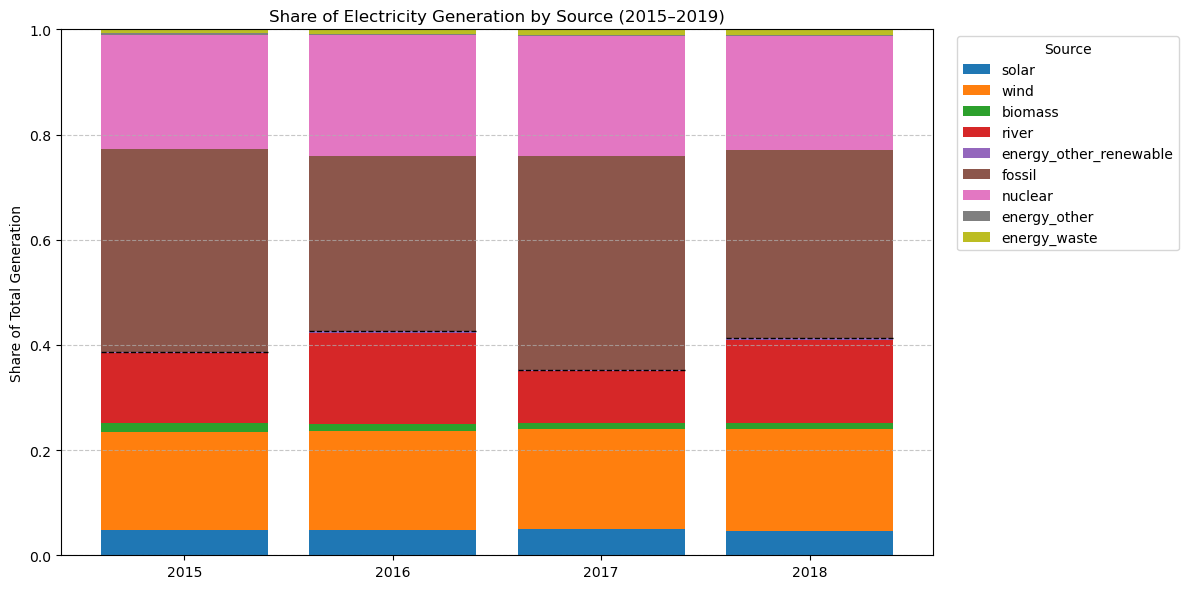

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define source groups
renewable_sources     = ['solar', 'wind', 'biomass', 'river', 'energy_other_renewable']
non_renewable_sources = ['fossil', 'nuclear', 'energy_other', 'energy_waste']
all_sources           = renewable_sources + non_renewable_sources

# Exclude 2014
data_filtered = data[data['Year'] > 2014].copy()

# Compute total generation from all considered sources
data_filtered['total_generation'] = data_filtered[all_sources].sum(axis=1)

# Compute share of each source over total generation
for source in all_sources:
    data_filtered[f'share_{source}'] = data_filtered[source] / data_filtered['total_generation']

# Compute yearly average shares
yearly_share = (
    data_filtered.groupby('Year')[[f'share_{s}' for s in all_sources]]
    .mean()
    .rename(columns={f'share_{s}': s for s in all_sources})
)

# Plotting
years = yearly_share.index.tolist()
bottom = np.zeros(len(years))

fig, ax = plt.subplots(figsize=(12, 6))

# Plot renewable sources
for source in renewable_sources:
    ax.bar(years, yearly_share[source], bottom=bottom, label=source)
    bottom += yearly_share[source].values

# Save the top of renewable stack to draw division line
renewable_top = bottom.copy()

# Plot non-renewable sources
for source in non_renewable_sources:
    ax.bar(years, yearly_share[source], bottom=bottom, label=source)
    bottom += yearly_share[source].values

# Draw division line between renewable and non-renewable
bar_width = 0.8
for i, year in enumerate(years):
    ax.hlines(
        y=renewable_top[i],
        xmin=year - bar_width / 2,
        xmax=year + bar_width / 2,
        colors='black',
        linestyles='dashed',
        linewidth=1
    )

# Formatting
ax.set_ylabel("Share of Total Generation")
ax.set_title("Share of Electricity Generation by Source (2015–2019)")
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_ylim(0, 1)
ax.legend(title="Source", bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the plot
plt.savefig("energy_source_shares_by_year.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


## A3

In [12]:
# Sources to analyze
sources = ['fossil', 'nuclear', 'solar', 'river', 'wind']

# Extract month from date
data['month'] = data['date'].dt.month

# Create a dictionary to hold results for each source
monthly_stats = {}

# Loop over each source
for source in sources:
    # Compute daily share
    data[f'share_{source}'] = data[source] / data['demand']

    # Group by month and compute statistics
    stats = data.groupby('month')[f'share_{source}'].agg(['mean', 'min', 'max', 'median', 'std']) * 100
    stats.columns = [f'{stat}_{source}' for stat in stats.columns]
    
    monthly_stats[source] = stats

# Combine all stats into a single DataFrame
final_df = pd.concat(monthly_stats.values(), axis=1)

# Optional: Sort months by calendar order
final_df = final_df.sort_index()

# Display the final table
pd.set_option('display.float_format', '{:.2f}%'.format)
print(final_df)

       mean_fossil  min_fossil  max_fossil  median_fossil  std_fossil  \
month                                                                   
1           36.87%      10.61%      66.58%         38.61%      10.08%   
2           32.48%       9.13%      67.95%         32.21%      11.21%   
3           29.39%      13.35%      69.18%         26.56%      10.44%   
4           31.03%      12.40%      70.62%         28.80%      11.25%   
5           33.35%       9.98%      76.60%         33.01%      10.76%   
6           36.97%      12.73%      75.26%         37.35%      11.36%   
7           39.85%      14.68%      63.78%         40.64%       9.41%   
8           38.00%      13.08%      60.91%         38.82%       8.79%   
9           39.40%      12.93%      68.04%         40.53%       9.16%   
10          41.37%      12.53%      72.10%         41.69%      11.00%   
11          44.10%      12.92%      78.15%         45.71%      12.63%   
12          38.77%      13.89%      67.38%         

In [13]:
import pandas as pd

# Sources to analyze
sources = ['fossil', 'nuclear', 'solar', 'river', 'wind']

# Extract month from date
data['month'] = data['date'].dt.month

# Create a dictionary to hold results for each source
monthly_stats = {}

# Loop over each source
for source in sources:
    # Compute daily share of the source relative to demand
    data[f'share_{source}'] = data[source] / data['demand']

    # Group by month and compute statistics, multiply by 100 to get percentage
    stats = data.groupby('month')[f'share_{source}'].agg(['mean', 'min', 'max', 'median', 'std']) * 100
    
    # Rename columns to indicate source
    stats.columns = [f'{stat}_{source}' for stat in stats.columns]
    
    monthly_stats[source] = stats

# Combine all stats into a single DataFrame
final_df = pd.concat(monthly_stats.values(), axis=1)

# Optional: Sort months by calendar order
final_df = final_df.sort_index()

# Display the final table nicely formatted with percentage sign
pd.set_option('display.float_format', '{:.2f}%'.format)
print(final_df)

# Now analyze standard deviation in December (month=12) and June (month=6)

# Select rows for December and June
dec_stats = final_df.loc[12]
jun_stats = final_df.loc[6]

# Extract only std columns for all sources
std_columns = [col for col in final_df.columns if col.startswith('std_')]

dec_std = dec_stats[std_columns]
jun_std = jun_stats[std_columns]

# Find source with lowest and highest standard deviation in December
dec_lowest_std_source = dec_std.idxmin().replace('std_', '')
dec_highest_std_source = dec_std.idxmax().replace('std_', '')

# Find source with lowest and highest standard deviation in June
jun_lowest_std_source = jun_std.idxmin().replace('std_', '')
jun_highest_std_source = jun_std.idxmax().replace('std_', '')

# Print the results
print("\nStandard deviation analysis:")
print(f"December (12):")
print(f"  Lowest std deviation source: {dec_lowest_std_source} with {dec_std.min():.2f}%")
print(f"  Highest std deviation source: {dec_highest_std_source} with {dec_std.max():.2f}%\n")

print(f"June (6):")
print(f"  Lowest std deviation source: {jun_lowest_std_source} with {jun_std.min():.2f}%")
print(f"  Highest std deviation source: {jun_highest_std_source} with {jun_std.max():.2f}%")


       mean_fossil  min_fossil  max_fossil  median_fossil  std_fossil  \
month                                                                   
1           36.87%      10.61%      66.58%         38.61%      10.08%   
2           32.48%       9.13%      67.95%         32.21%      11.21%   
3           29.39%      13.35%      69.18%         26.56%      10.44%   
4           31.03%      12.40%      70.62%         28.80%      11.25%   
5           33.35%       9.98%      76.60%         33.01%      10.76%   
6           36.97%      12.73%      75.26%         37.35%      11.36%   
7           39.85%      14.68%      63.78%         40.64%       9.41%   
8           38.00%      13.08%      60.91%         38.82%       8.79%   
9           39.40%      12.93%      68.04%         40.53%       9.16%   
10          41.37%      12.53%      72.10%         41.69%      11.00%   
11          44.10%      12.92%      78.15%         45.71%      12.63%   
12          38.77%      13.89%      67.38%         

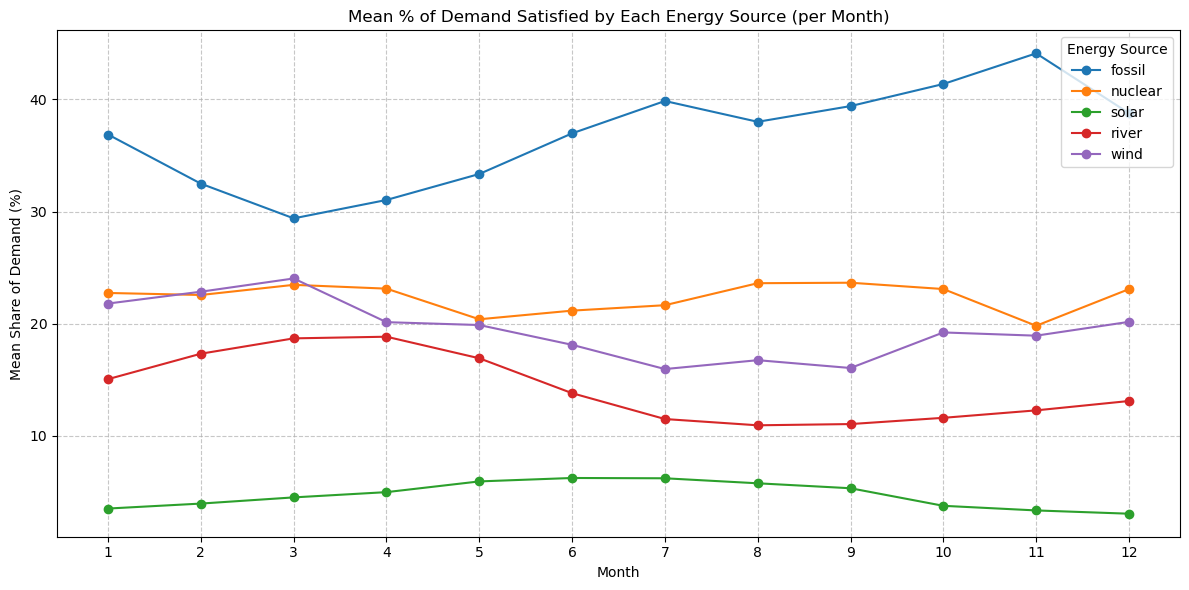

In [14]:
import matplotlib.pyplot as plt

# Extract only the mean values from the final DataFrame
mean_columns = [col for col in final_df.columns if col.startswith('mean_')]
mean_df = final_df[mean_columns]

# Rename columns for readability
mean_df.columns = [col.replace('mean_', '') for col in mean_df.columns]

# Plot
plt.figure(figsize=(12, 6))
for source in mean_df.columns:
    plt.plot(mean_df.index, mean_df[source], marker='o', label=source)

plt.title('Mean % of Demand Satisfied by Each Energy Source (per Month)')
plt.xlabel('Month')
plt.ylabel('Mean Share of Demand (%)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()


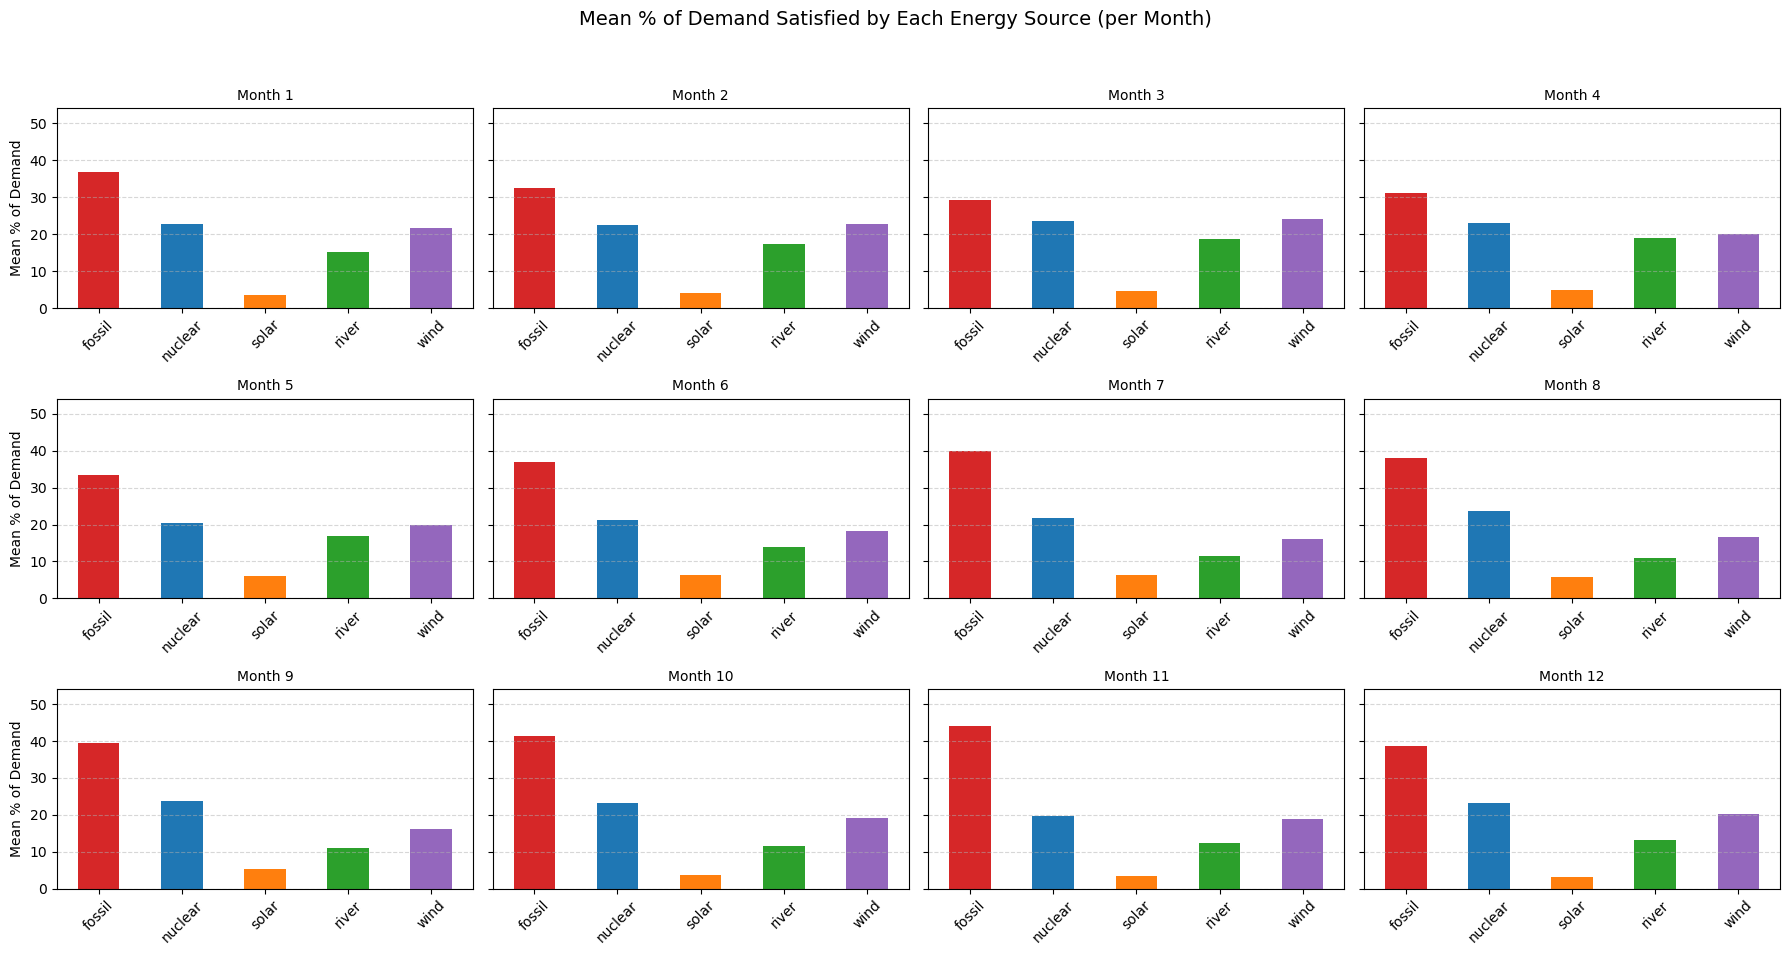

In [15]:
# Reuse the mean_df from previous steps
# mean_df has energy sources as columns and months as index (1–12)

# Create subplots: 3 rows × 4 columns for 12 months
fig, axes = plt.subplots(3, 4, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, month in enumerate(mean_df.index):
    ax = axes[i]
    month_data = mean_df.loc[month]
    month_data.plot(kind='bar', ax=ax, color=['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])

    ax.set_title(f'Month {month}', fontsize=10)
    ax.set_ylabel('Mean % of Demand')
    ax.set_ylim(0, mean_df.max().max() + 10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)

# Global figure settings
fig.suptitle('Mean % of Demand Satisfied by Each Energy Source (per Month)', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## A4

In [17]:
# Compute production-to-demand ratio
data['prod_demand_ratio'] = data['prod'] / data['demand']

# Group by Season and Hour (4×24 = 96 groups)
season_hour = data.groupby(['Season', 'Hour']).agg(
    avg_price=('price', 'mean'),
    avg_ratio=('prod_demand_ratio', 'mean')
).reset_index()

# Group by Month and Hour (12×24 = 288 groups)
month_hour = data.groupby(['Month', 'Hour']).agg(
    avg_price=('price', 'mean'),
    avg_ratio=('prod_demand_ratio', 'mean')
).reset_index()

# Find minimum and maximum price in both
min_price_season = season_hour.loc[season_hour['avg_price'].idxmin()]
max_price_season = season_hour.loc[season_hour['avg_price'].idxmax()]
min_price_month = month_hour.loc[month_hour['avg_price'].idxmin()]
max_price_month = month_hour.loc[month_hour['avg_price'].idxmax()]

In [18]:
# Print season-level min and max price situations
print("=== Season-Level Extremes ===")
print(f"Min Price (Season): {min_price_season['avg_price']:.2f} at Season = {min_price_season['Season']}, Hour = {int(min_price_season['Hour'])}")
print(f"  Corresponding prod/demand ratio: {min_price_season['avg_ratio']:.2f}")
print(f"Max Price (Season): {max_price_season['avg_price']:.2f} at Season = {max_price_season['Season']}, Hour = {int(max_price_season['Hour'])}")
print(f"  Corresponding prod/demand ratio: {max_price_season['avg_ratio']:.2f}")

# Print month-level min and max price situations
print("\n=== Month-Level Extremes ===")
print(f"Min Price (Month): {min_price_month['avg_price']:.2f} at Month = {int(min_price_month['Month'])}, Hour = {int(min_price_month['Hour'])}")
print(f"  Corresponding prod/demand ratio: {min_price_month['avg_ratio']:.2f}")
print(f"Max Price (Month): {max_price_month['avg_price']:.2f} at Month = {int(max_price_month['Month'])}, Hour = {int(max_price_month['Hour'])}")
print(f"  Corresponding prod/demand ratio: {max_price_month['avg_ratio']:.2f}")


=== Season-Level Extremes ===
Min Price (Season): 41.62 at Season = Winter, Hour = 3
  Corresponding prod/demand ratio: 1.13
Max Price (Season): 75.59 at Season = Autumn, Hour = 18
  Corresponding prod/demand ratio: 0.97

=== Month-Level Extremes ===
Min Price (Month): 37.99 at Month = 3, Hour = 3
  Corresponding prod/demand ratio: 1.12
Max Price (Month): 76.97 at Month = 12, Hour = 18
  Corresponding prod/demand ratio: 0.96
